In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
Data = pd.read_csv('C:/Users/Dell/FYP/ReadyX.csv')
Data.rename(columns={'Unnamed: 0':'index'},inplace=True)
Data = Data.drop(['index'], axis=1)

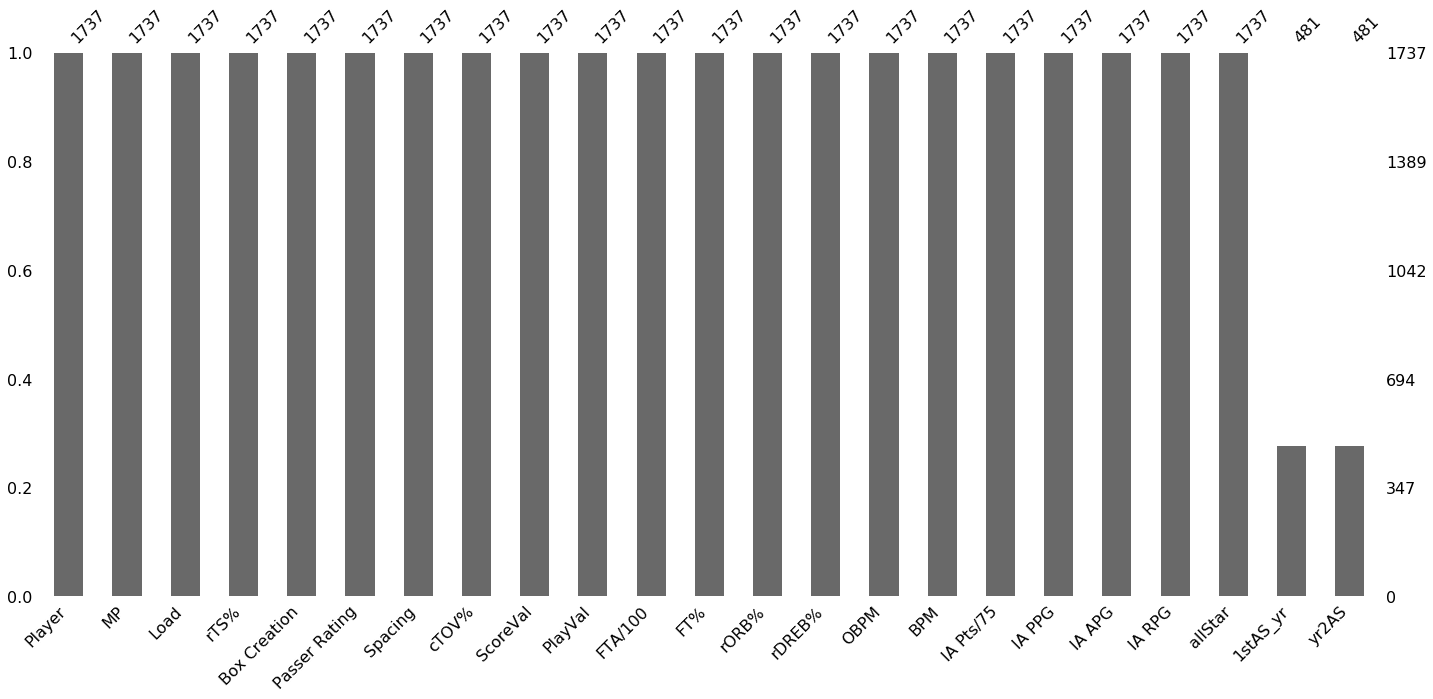

In [26]:
msno.bar(Data)

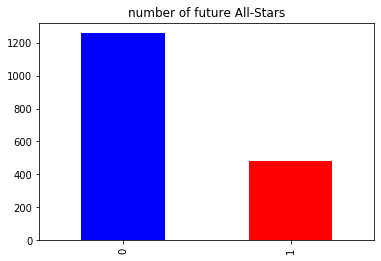

In [32]:
Data['allStar'].value_counts().plot.bar(title='number of future All-Stars', color=('blue','red'))

## Data Sampling to fix class imbalance

since we already have more data in this approach(by using sophomore data as well), we will under sample the non-AS

In [28]:
Data['allStar'].sum()

481

In [29]:
Data.shape

(1737, 23)

1256 non AS, 481 AS. will have to drop 60% of non AS to match

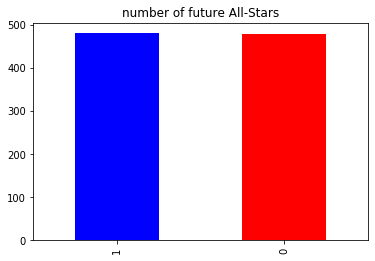

In [56]:
Data = Data.drop(Data.query('allStar < 1').sample(frac=.619).index)
''' Title: Randomly remove rows with condition Source Code
Author: piRSquared
Date: 2020
Availablilty: https://stackoverflow.com/questions/41912204/randomly-remove-rows-from-dataframe-based-on-condition'''

Data['allStar'].value_counts().plot.bar(title='number of future All-Stars', color=('blue','red'))

may have class imbalance problem. For more info:http://www.chioka.in/class-imbalance-problem/

In [17]:
Data.head()

,Player,MP,Load,rTS%,Box Creation,Passer Rating,Spacing,cTOV%,ScoreVal,PlayVal,...,rDREB%,OBPM,BPM,IA Pts/75,IA PPG,IA APG,IA RPG,allStar,1stAS_yr,yr2AS
0,A.C. Green,1542,18.9,0.023,0.6,2.3,68.0,0.159,0.0,0.0,...,0.0,-0.4,0.4,12.2,6.1,0.6,4.6,1,1990.0,4.0
4,Adam Keefe,1549,21.2,0.028,0.5,3.1,76.0,0.151,-0.4,-1.0,...,5.9,-0.4,-0.1,13.1,6.3,0.9,4.9,0,NaN,NaN
5,Adrian Dantley,2816,28.3,0.090,0.8,2.0,83.0,0.152,1.4,-0.8,...,-1.5,1.1,0.0,20.7,19.5,1.7,6.7,1,1980.0,3.0
6,Adrian Smith,1462,24.2,0.004,2.5,3.7,77.0,0.153,-0.1,-0.1,...,-7.9,-0.7,-1.4,13.3,5.8,1.8,1.0,1,1966.0,4.0
7,Al Attles,1544,21.8,-0.029,1.8,3.8,60.0,0.142,-0.8,-0.4,...,-6.5,-1.2,-0.8,11.6,5.8,2.0,1.5,0,NaN,NaN


In [57]:
Data.describe()

,MP,Load,rTS%,Box Creation,Passer Rating,Spacing,cTOV%,ScoreVal,PlayVal,FTA/100,...,rDREB%,OBPM,BPM,IA Pts/75,IA PPG,IA APG,IA RPG,allStar,1stAS_yr,yr2AS
count,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,...,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,481.000000,481.00000
mean,1826.145833,28.103229,-0.006305,2.094167,3.970729,86.389583,0.125121,-0.305313,-0.449792,5.602917,...,0.148681,-0.089980,-0.013586,16.238646,10.680625,2.108125,4.353437,0.501042,1987.692308,2.66736
std,743.061317,5.582198,0.036107,1.383045,1.292526,16.938283,0.025306,0.598628,0.482391,1.888689,...,5.588056,0.970785,1.436629,3.397775,4.939538,1.393848,2.466304,0.500260,17.127978,1.87793
min,504.000000,14.200000,-0.101000,0.200000,1.400000,54.000000,0.072000,-1.700000,-1.600000,1.600000,...,-9.500000,-2.600000,-3.500000,7.500000,2.100000,0.100000,0.800000,0.000000,1955.000000,0.00000
25%,1201.000000,24.100000,-0.029250,1.100000,3.000000,74.000000,0.107750,-0.700000,-0.800000,4.200000,...,-4.900000,-0.800000,-1.000000,13.800000,6.600000,1.100000,2.400000,0.000000,1972.000000,1.00000
50%,1790.000000,27.850000,-0.005000,1.800000,3.900000,82.000000,0.124000,-0.300000,-0.500000,5.400000,...,-0.500000,-0.100000,-0.100000,16.100000,9.900000,1.800000,3.750000,1.000000,1989.000000,2.00000
75%,2466.750000,31.800000,0.020000,2.800000,4.900000,99.000000,0.142000,0.100000,-0.100000,6.800000,...,4.425000,0.600000,0.900000,18.500000,14.100000,2.800000,5.800000,1.000000,2002.000000,4.00000
max,3695.000000,43.400000,0.090000,6.900000,7.600000,128.000000,0.220000,1.400000,0.800000,11.500000,...,16.400000,2.500000,3.900000,24.600000,24.300000,6.900000,12.400000,1.000000,2019.000000,7.00000


### getting the data ready

can try train test valid split; 
can try disregard standard scaler

In [283]:
# #set variables as x, target as y 
# 'IA PPG', 'ScoreVal', 'MP', 'OBPM', 'FTA/100'
# 'IA PPG', 'MP', 'BPM', 'rORB%', 'Load'
# 'IA PPG', 'MP', 'ScoreVal', 'OBPM', 'IA Pts/75'

x_col = ['IA PPG', 'ScoreVal', 'OBPM', 'FTA/100']
x = Data[x_col]
y = Data['allStar']

#split the data into train test set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

#standardize the input data using Standard Scaler, get better results
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#shows the number of allStars for each split, to check for proportions
print('Data has allStar count:', Data['allStar'].sum())
print('train data class allStar count:', y_train.sum())
print('test data class allStar count:', y_test.sum())


Data has allStar count: 481
train data class allStar count: 384
test data class allStar count: 97


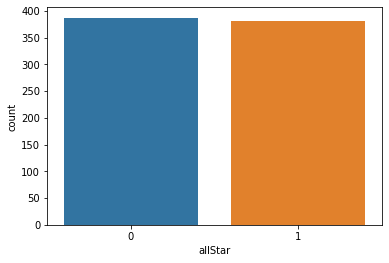

In [65]:
sns.countplot(x = y_train)

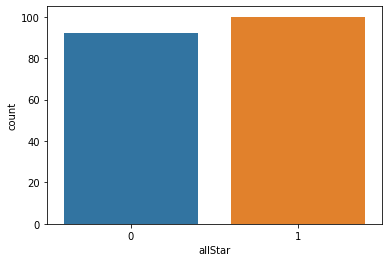

In [64]:
sns.countplot(x = y_test)

## Model 1: Logistic Regression(baseline model)

In [284]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
logModel = LogisticRegression()
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4,1,4,20),
     'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
     'max_iter': [100, 1000, 2500, 5000]
    }
]

clf1 = GridSearchCV(logModel, param_grid = param_grid, cv = 10, 
                   verbose=True, scoring = 'accuracy', n_jobs=-1)

best_clf1 = clf1.fit(x_train, y_train)
best_clf1.score(x_test, y_test)
''' Title: GridSearchCV with LogisticRegression Source Code
Author: Kunaal Naik
Date: 2020
Availablilty: https://www.youtube.com/watch?v=pooXM9mM7FU&list=PLl8C_JqwFwwMlzGTUVf4ee6BAJQSueQ0T&index=6&t=165s'''

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 3193 out of 3200 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed:    2.3s finished


0.7135416666666666

In [114]:
confusion_matrix(y_test,best_clf1.predict(x_test))

array([[83, 11],
       [37, 61]], dtype=int64)

In [115]:
#comprehensive report on the classification
print(classification_report(y_test, best_clf1.predict(x_test)))

              precision    recall  f1-score   support

           0       0.69      0.88      0.78        94
           1       0.85      0.62      0.72        98

    accuracy                           0.75       192
   macro avg       0.77      0.75      0.75       192
weighted avg       0.77      0.75      0.75       192



In [213]:
best_clf1.best_params_

{'C': 0.0001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

## Model 2: MLPClassifier (Neural Network)

In [246]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
#use classifier because target is binary (category)
nnModel = MLPClassifier()

parameters = {'solver': ['lbfgs'], 'max_iter': 
              [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], 
              'alpha': 10.0 ** -np.arange(1, 10), 
              'hidden_layer_sizes':np.arange(10, 15), 
              'random_state':[0,1,2,3,4,5,6,7,8,9]}

clf2 = RandomizedSearchCV(nnModel, parameters, cv=10, verbose=True, 
                    scoring = 'accuracy', n_jobs=-1)

results = []
total = 0
for counter in range(1, 6):
    best_clf2  = clf2.fit(x_train, y_train)
    total = total + best_clf2.score(x_test, y_test)
    results.append(best_clf2.score(x_test, y_test))

print(results)
print(total/5)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.1s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.2s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.2s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.6s finished


[0.6927083333333334, 0.6354166666666666, 0.6302083333333334, 0.671875, 0.6875]
0.6635416666666667


In [66]:
confusion_matrix(y_test, best_clf2.predict(x_test))

array([[85, 20],
       [29, 63]], dtype=int64)

In [121]:
print(classification_report(y_test, best_clf2.predict(x_test)))

              precision    recall  f1-score   support

           0       0.66      0.76      0.71        94
           1       0.73      0.63      0.68        98

    accuracy                           0.69       192
   macro avg       0.70      0.69      0.69       192
weighted avg       0.70      0.69      0.69       192



In [202]:
best_clf2.best_params_

{'solver': 'lbfgs',
 'random_state': 9,
 'max_iter': 1200,
 'hidden_layer_sizes': 11,
 'alpha': 1e-06}

## Model 3: SVC

In [247]:
from sklearn.svm import SVC
classifier = SVC()

parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
             {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': 
              [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]


clf3 = RandomizedSearchCV(classifier, parameters, scoring = 'accuracy', 
                          verbose = True, cv = 10, n_jobs = -1)

results = []
total = 0
for counter in range(1, 6):
    best_clf3  = clf3.fit(x_train, y_train)
    total = total + best_clf3.score(x_test, y_test)
    results.append(best_clf3.score(x_test, y_test))

print(results)
print(total/5)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  93 out of 100 | elapsed:    6.5s remaining:    0.4s


[0.6927083333333334, 0.7291666666666666, 0.6927083333333334, 0.7135416666666666, 0.6927083333333334]
0.7041666666666667


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.9s finished


In [141]:
print(classification_report(y_test, best_clf3.predict(x_test)))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       105
           1       0.76      0.65      0.70        92

    accuracy                           0.74       197
   macro avg       0.74      0.74      0.74       197
weighted avg       0.74      0.74      0.74       197



In [216]:
best_clf3.best_params_

{'kernel': 'rbf', 'gamma': 0.3, 'C': 1}

## Model 4: Random Forest Classifier

In [248]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
RanModel = RandomForestClassifier()
param_grid5 = [{'n_estimators' : [10,100,1000],
               'max_depth':[5,8,15,25,30,None],
               'min_samples_leaf': [1,2,5,10,15,100],
               'max_leaf_nodes': [2,5,10]}]


clf4 = RandomizedSearchCV(RanModel, param_grid5, cv = 10, 
                   verbose=True, scoring = 'accuracy',  n_jobs=-1)
results = []
total = 0
for counter in range(1, 6):
    best_clf4 = clf4.fit(x_train, y_train)
    total = total + best_clf4.score(x_test, y_test)
    results.append(best_clf4.score(x_test, y_test))

print(results)
print(total/5)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  93 out of 100 | elapsed:   10.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   23.5s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.6s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   24.5s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.0s finished


[0.703125, 0.7083333333333334, 0.71875, 0.71875, 0.7239583333333334]
0.7145833333333333


In [94]:
print(classification_report(y_test, best_clf4.predict(x_test)))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       105
           1       0.78      0.67      0.73        92

    accuracy                           0.76       197
   macro avg       0.77      0.76      0.76       197
weighted avg       0.76      0.76      0.76       197



In [204]:
best_clf4.best_params_

{'n_estimators': 10,
 'min_samples_leaf': 2,
 'max_leaf_nodes': 10,
 'max_depth': None}